In [1]:
# mostly copied from bayesian-bandit-viz notebook
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from collections import namedtuple
import random

In [2]:
Probable_Arm = namedtuple('Probable_Arm', ['arm', 'win_probability'])

class Arm():
    def __init__(self):
        self.alpha = 1
        self.beta = 1
        
        self.rewards = 0
        self.tries = 0
        

    def update(self, was_success):
        self.tries += 1
        self.rewards += int(was_success)
        
        self.alpha += self.rewards
        self.beta += (self.tries - self.rewards)
        

In [3]:

Winner_Pair = namedtuple('Winner_Pair', ['arm', 'probability'])

def get_winner(arms):
    winner = None
    for arm in arms:
        arm_probability = stats.beta.rvs(arm.arm.alpha, arm.arm.beta)
        if winner is None:
            winner = Winner_Pair(arm=arm, probability=arm_probability)
        elif arm_probability > winner.probability:
            winner = Winner_Pair(arm=arm, probability=arm_probability)
    return winner.arm


In [4]:
def create_arms(probabilities):
    return [Probable_Arm(arm=Arm(), win_probability=i) 
            for i in probabilities]
        

In [5]:
def run_trial(arm):
    was_success = False
    r = random.random()

    if arm.win_probability > random.random():
        was_success = True
    arm.arm.update(was_success)
    return arm


In [6]:
def optimal_found(num_trials, probs):
    arms = set(create_arms(probs))

    for i in range(num_trials):
        winner = get_winner(arms)
        arms.remove(winner)

        arm = run_trial(winner)
        arms.add(arm)
        
    arm_list = list(arms)
    winner = max(arms, key=lambda x: x.arm.tries)
    return winner.win_probability == max(probs)

    

In [49]:
midpoint = 0.07
trials = 200

results = pd.DataFrame(columns=['win_prob_high', 'win_prob_low', 'arm_pulls', 'perc_correct'])
i = 0
for diff in np.linspace(0.01, 0.05, 5):
    for arm_pulls in range(0, 2100, 100):
        tries = 0
        correct_guesses = 0
        plus_minus = diff / 2.0
        
        win_prob_high = midpoint + plus_minus
        win_prob_low = midpoint - plus_minus
        
        for j in range(trials):
            i += 1
            tries += 1
            correct_guesses += int(optimal_found(arm_pulls, [win_prob_high, win_prob_low]))
            
            if i % 500 == 0:
                print(i)
            
        results.loc[len(results)] = [win_prob_high, win_prob_low, arm_pulls, (correct_guesses / tries)]
        

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000


In [50]:
results.to_csv('./did-it-work-3.csv')



In [51]:
results["perc_diff"] = round((results["win_prob_high"] - results["win_prob_low"]) / results["win_prob_high"], 2)

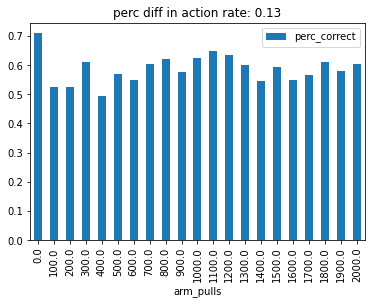

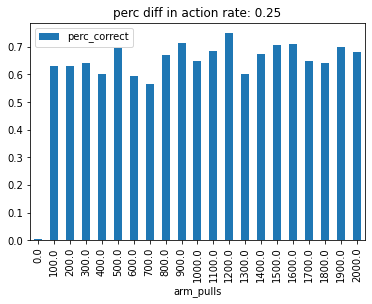

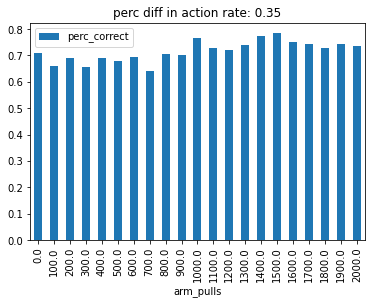

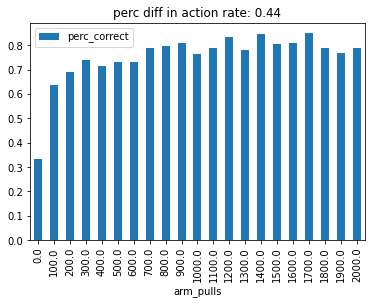

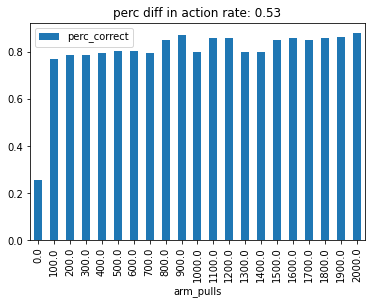

In [52]:


for i in results.perc_diff.unique():
    results[results["perc_diff"] == i][["arm_pulls", "perc_correct"]].plot.bar(x="arm_pulls", y="perc_correct")
    plt.title(f"perc diff in action rate: {i}")
    plt.show()

In [53]:
midpoint = 0.07
trials = 100

results = pd.DataFrame(columns=['win_prob_high', 'win_prob_low', 'arm_pulls', 'perc_correct'])
i = 0
for diff in np.linspace(0.01, 0.05, 5):
    for arm_pulls in range(1, 111, 10):
        tries = 0
        correct_guesses = 0
        plus_minus = diff / 2.0
        
        win_prob_high = midpoint + plus_minus
        win_prob_low = midpoint - plus_minus
        
        for j in range(trials):
            i += 1
            tries += 1
            correct_guesses += int(optimal_found(arm_pulls, [win_prob_high, win_prob_low]))
            
            if i % 100 == 0:
                print(i)
            
        results.loc[len(results)] = [win_prob_high, win_prob_low, arm_pulls, (correct_guesses / tries)]
        

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500


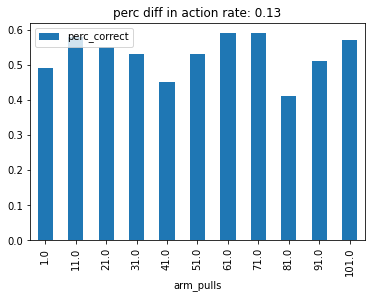

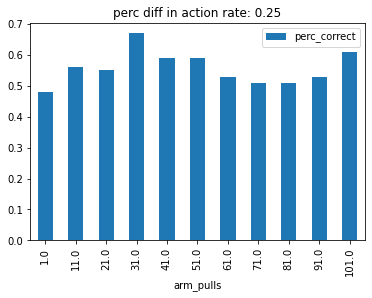

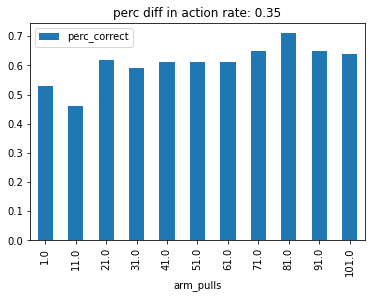

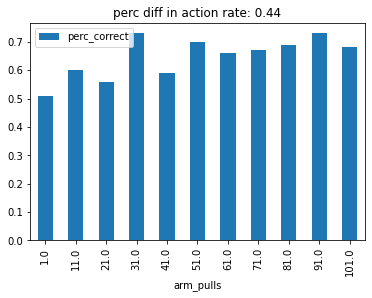

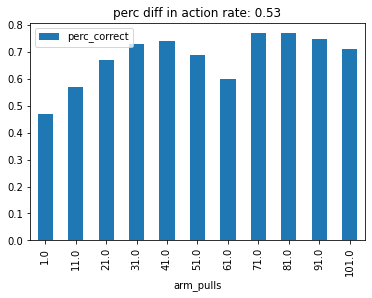

In [54]:
results["perc_diff"] = round((results["win_prob_high"] - results["win_prob_low"]) / results["win_prob_high"], 2)
for i in results.perc_diff.unique():
    results[results["perc_diff"] == i][["arm_pulls", "perc_correct"]].plot.bar(x="arm_pulls", y="perc_correct")
    plt.title(f"perc diff in action rate: {i}")
    plt.show()

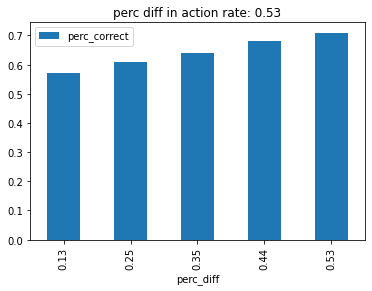

In [55]:
# for i in results.perc_diff.unique():
results[results["arm_pulls"] == 101.0][["perc_diff", "perc_correct"]].plot.bar(x="perc_diff", y="perc_correct")
plt.title(f"perc diff in action rate: {i}")
plt.show()

In [85]:
# with regret

midpoint = 0.07
trials = 200

regret_results = pd.DataFrame(columns=['win_prob_high', 'win_prob_low', 'arm_pulls', 'perc_correct'])
i = 0
for diff in np.linspace(0.01, 0.05, 10):
    for arm_pulls in range(1, 201, 50):
        tries = 0
        correct_guesses = 0
        plus_minus = diff / 2.0
        
        win_prob_high = midpoint + plus_minus
        win_prob_low = midpoint - plus_minus
        
        for j in range(trials):
            i += 1
            tries += 1
            correct_guesses += int(optimal_found(arm_pulls, [win_prob_high, win_prob_low]))
            
            if i % 500 == 0:
                print(i)
            
        regret_results.loc[len(regret_results)] = [win_prob_high, win_prob_low, arm_pulls, (correct_guesses / tries)]

regret_results["perc_diff"] = (results["win_prob_high"] - results["win_prob_low"]) / results["win_prob_high"]
 

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000


In [86]:
regret_results["best_case"] = (regret_results["win_prob_high"] * regret_results["arm_pulls"]) 

regret_results["actual_win_perc"] = (
    (regret_results["perc_correct"] * regret_results["win_prob_high"]) + 
    ((1 - regret_results["perc_correct"]) * regret_results["win_prob_low"])
)   
regret_results["regret_for_1000pulls"] = (regret_results["win_prob_high"] * 1000) - (regret_results["actual_win_perc"] * 1000)

,win_prob_high,win_prob_low,arm_pulls,perc_correct,perc_diff,best_case,actual_win_perc,regret_for_1000pulls
0,0.075000,0.065000,1.0,0.505,0.133333,0.075000,0.070050,4.950000
1,0.075000,0.065000,51.0,0.585,0.133333,3.825000,0.070850,4.150000
2,0.075000,0.065000,101.0,0.540,0.133333,7.575000,0.070400,4.600000
3,0.075000,0.065000,151.0,0.625,0.133333,11.325000,0.071250,3.750000
4,0.077222,0.062778,1.0,0.575,0.133333,0.077222,0.071083,6.138889
5,0.077222,0.062778,51.0,0.545,0.133333,3.938333,0.070650,6.572222
6,0.077222,0.062778,101.0,0.540,0.133333,7.799444,0.070578,6.644444
7,0.077222,0.062778,151.0,0.585,0.133333,11.660556,0.071228,5.994444
8,0.079444,0.060556,1.0,0.455,0.133333,0.079444,0.069150,10.294444
9,0.079444,0.060556,51.0,0.570,0.133333,4.051667,0.071322,8.122222


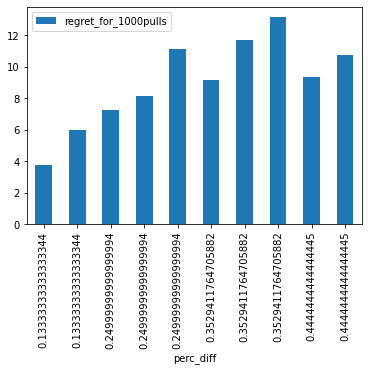

In [87]:
regret_results[regret_results["arm_pulls"] == 151.0].plot.bar(x="perc_diff", y="regret_for_1000pulls")
regret_results